# **<span style="color: orange;">6. Modeling of Data: Transformers</span>**

***Transformer Comparison***

In [6]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

In [2]:
# load Dataframe
df = pd.read_csv('combined_evaluation.csv')
df

,Model,Prediction Count - Class 1,Prediction Count - Class 0,Class 0 - precision,Class 0 - recall,Class 0 - f1-score,Class 0 - support,Class 1 - precision,Class 1 - recall,Class 1 - f1-score,Class 1 - support,accuracy,macro avg - precision,macro avg - recall,macro avg - f1-score,macro avg - support,weighted avg - precision,weighted avg - recall,weighted avg - f1-score,weighted avg - support
0,distilbert-base-uncased-10-epochs,565,135,0.659259,0.415888,0.510029,214.0,0.778761,0.905350,0.837298,486.0,0.755714,0.719010,0.660619,0.673663,700.0,0.742228,0.755714,0.737247,700.0
1,distilbert-base-uncased-5-epochs,534,166,0.590361,0.457944,0.515789,214.0,0.782772,0.860082,0.819608,486.0,0.737143,0.686566,0.659013,0.667699,700.0,0.723949,0.737143,0.726726,700.0
2,distilroberta-base-10-epochs,575,125,0.640000,0.373832,0.471976,214.0,0.766957,0.907407,0.831291,486.0,0.744286,0.703478,0.640620,0.651634,700.0,0.728144,0.744286,0.721444,700.0
3,distilroberta-base-5-epochs,467,233,0.549356,0.598131,0.572707,214.0,0.815846,0.783951,0.799580,486.0,0.727143,0.682601,0.691041,0.686144,700.0,0.734376,0.727143,0.730222,700.0
4,distilroberta_financial-10-epochs,598,102,0.705882,0.336449,0.455696,214.0,0.762542,0.938272,0.841328,486.0,0.754286,0.734212,0.637360,0.648512,700.0,0.745220,0.754286,0.723435,700.0
5,distilroberta_financial-5-epochs,558,142,0.626761,0.415888,0.500000,214.0,0.775986,0.890947,0.829502,486.0,0.745714,0.701373,0.653417,0.664751,700.0,0.730365,0.745714,0.728768,700.0
6,Finbert-10-epochs,630,70,0.757143,0.247664,0.373239,214.0,0.744444,0.965021,0.840502,486.0,0.745714,0.750794,0.606342,0.606871,700.0,0.748327,0.745714,0.697653,700.0
7,Finbert-5-epochs,553,147,0.625850,0.429907,0.509695,214.0,0.779385,0.886831,0.829644,486.0,0.747143,0.702618,0.658369,0.669670,700.0,0.732447,0.747143,0.731831,700.0
8,Finbert_sentiment-10-epochs,523,177,0.581921,0.481308,0.526854,214.0,0.787763,0.847737,0.816650,486.0,0.735714,0.684842,0.664523,0.671752,700.0,0.724834,0.735714,0.728055,700.0
9,Finbert_Sentiment-5-epochs,585,115,0.591304,0.317757,0.413374,214.0,0.750427,0.903292,0.819795,486.0,0.724286,0.670866,0.610525,0.616584,700.0,0.701781,0.724286,0.695546,700.0


In [12]:
# Calculate average F1 scores
avg_f1_class_0 = df['Class 0 - f1-score'].mean()
avg_f1_class_1 = df['Class 1 - f1-score'].mean()
avg_f1_overall = df['macro avg - f1-score'].mean()


# Print the results
print(f"Average F1 Score for Class 0: {avg_f1_class_0:.4f}")
print(f"Average F1 Score for Class 1: {avg_f1_class_1:.4f}")
print(f"Average Overall F1 Score: {avg_f1_overall:.4f}")


# calculate and print average accuracy
avg_accuracy = df['accuracy'].mean()
print(f"Average Accuracy: {avg_accuracy:.4f}")

Average F1 Score for Class 0: 0.4849
Average F1 Score for Class 1: 0.8265
Average Overall F1 Score: 0.6557
Average Accuracy: 0.7417


The overall accuracy and F1 score do not reflect the true performance of the models. While interpreting the combined F1 score and accuracy, the performance of the models may appear acceptable, but the average F1 scores for Class 1 and Class 0 reveal a significant discrepancy, with the models lacking consistency in predicting Class 0. As already mentioned during the training of the individual models, this could be due to the class imbalance in the dataset. Additionally, the amount of data used may not have been sufficient. 

In [18]:
# Filter models with 5 epochs
df_5_epochs = df[df['Model'].str.contains('5-epochs')]

# Calculate average F1 scores
avg_f1_class_0 = df_5_epochs['Class 0 - f1-score'].mean()
avg_f1_class_1 = df_5_epochs['Class 1 - f1-score'].mean()
avg_f1_overall = df_5_epochs['macro avg - f1-score'].mean()

# Print the results
print(f"Average F1 Score for Class 0 (5 epochs): {avg_f1_class_0:.4f}")
print(f"Average F1 Score for Class 1 (5 epochs): {avg_f1_class_1:.4f}")
print(f"Average Overall F1 Score (5 epochs): {avg_f1_overall:.4f}")

# Calculate and print average accuracy
avg_accuracy = df_5_epochs['accuracy'].mean()
print(f"Average Accuracy (5 epochs): {avg_accuracy:.4f}")


# Filter models with 10 epochs
df_10_epochs = df[df['Model'].str.contains('10-epochs')]

# Calculate average F1 scores
avg_f1_class_0 = df_10_epochs['Class 0 - f1-score'].mean()
avg_f1_class_1 = df_10_epochs['Class 1 - f1-score'].mean()
avg_f1_overall = df_10_epochs['macro avg - f1-score'].mean()

# Print the results
print(f"Average F1 Score for Class 0 (10 epochs): {avg_f1_class_0:.4f}")
print(f"Average F1 Score for Class 1 (10 epochs): {avg_f1_class_1:.4f}")
print(f"Average Overall F1 Score (10 epochs): {avg_f1_overall:.4f}")

# Calculate and print average accuracy
avg_accuracy = df_10_epochs['accuracy'].mean()
print(f"Average Accuracy (10 epochs): {avg_accuracy:.4f}")

Average F1 Score for Class 0 (5 epochs): 0.5023
Average F1 Score for Class 1 (5 epochs): 0.8196
Average Overall F1 Score (5 epochs): 0.6610
Average Accuracy (5 epochs): 0.7363
Average F1 Score for Class 0 (10 epochs): 0.4676
Average F1 Score for Class 1 (10 epochs): 0.8334
Average Overall F1 Score (10 epochs): 0.6505
Average Accuracy (10 epochs): 0.7471


Looking at the difference between the two epoch amounts, it can be seen that the models trained for 5 epochs have a better F1 score for Class 0 but a slightly worse F1 score for Class 1. This could be due to the ten-epoch models being mostly overfitted. However, it should be noted that the difference is not significant. 

C:\Users\juhirsch\AppData\Local\Temp\ipykernel_8048\2212099608.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('YlGnBu_r', len(df_5_epochs))


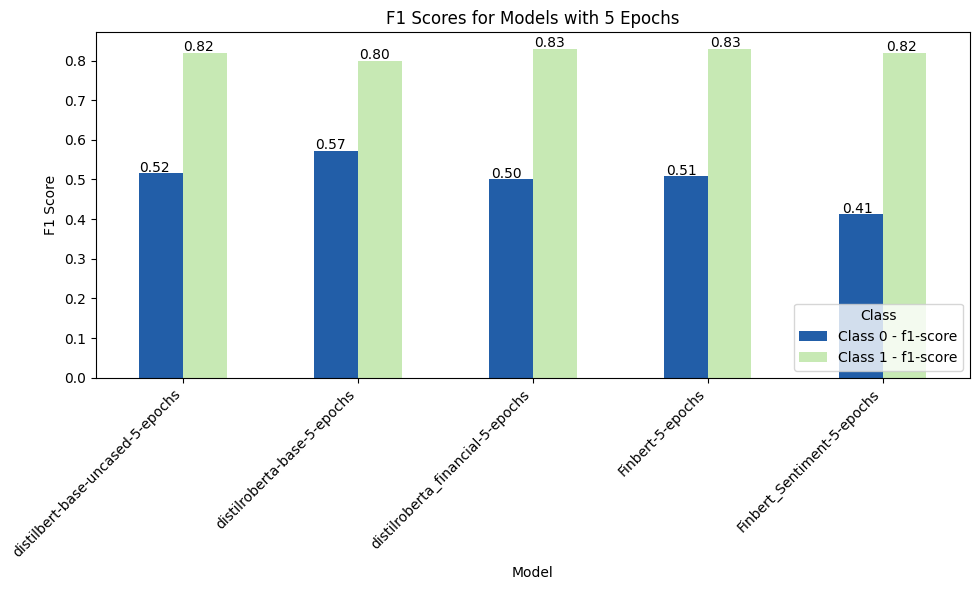

In [15]:
# Filter models with 5 epochs
df_5_epochs = df[df['Model'].str.contains('5-epochs')]

# Set the model names as index
df_5_epochs.set_index('Model', inplace=True)

# Create a color map
color_map = cm.get_cmap('YlGnBu_r', len(df_5_epochs))

# Plot the F1 scores for Class 0 and Class 1
ax = df_5_epochs[['Class 0 - f1-score', 'Class 1 - f1-score']].plot(kind='bar', figsize=(10, 6), color=[color_map(0.2), color_map(0.6)])

# Add title and labels
plt.title('F1 Scores for Models with 5 Epochs')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Place the legend at the bottom right
plt.legend(title='Class', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Looking at the individual models with five epochs, it can be seen that the distilroberta-base performed best in terms of F1 score for Class 0 prediction but also performed the worst in terms of F1 score for Class 1. Overall, all the models are close together, with Finbert-Sentiment being an exception, showing a significantly worse F1 score for Class 0.

C:\Users\juhirsch\AppData\Local\Temp\ipykernel_8048\3459586583.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('YlGnBu_r', len(df_10_epochs))


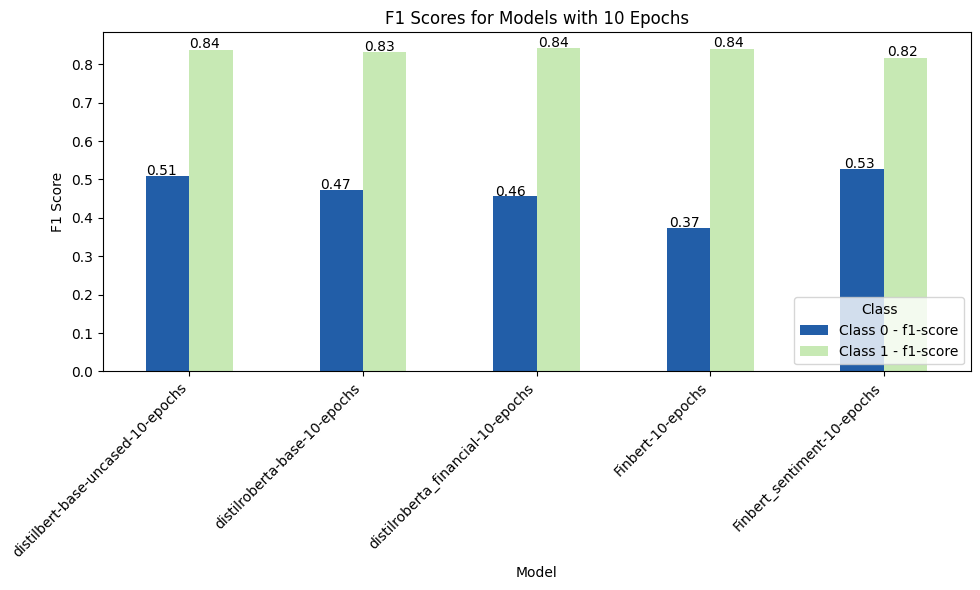

In [16]:
# Filter models with 10 epochs
df_10_epochs = df[df['Model'].str.contains('10-epochs')]

# Set the model names as index
df_10_epochs.set_index('Model', inplace=True)

# Create a color map
color_map = cm.get_cmap('YlGnBu_r', len(df_10_epochs))

# Plot the F1 scores for Class 0 and Class 1
ax = df_10_epochs[['Class 0 - f1-score', 'Class 1 - f1-score']].plot(kind='bar', figsize=(10, 6), color=[color_map(0.2), color_map(0.6)])

# Add title and labels
plt.title('F1 Scores for Models with 10 Epochs')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Place the legend at the bottom right
plt.legend(title='Class', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Looking at the individual models with ten epochs, it can be seen that there is the same trend, with all of them being very similar, except for Finbert, which has an F1 score of 0.37 for Class 0.

C:\Users\juhirsch\AppData\Local\Temp\ipykernel_8048\3255636532.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('YlGnBu_r', len(df_epochs))


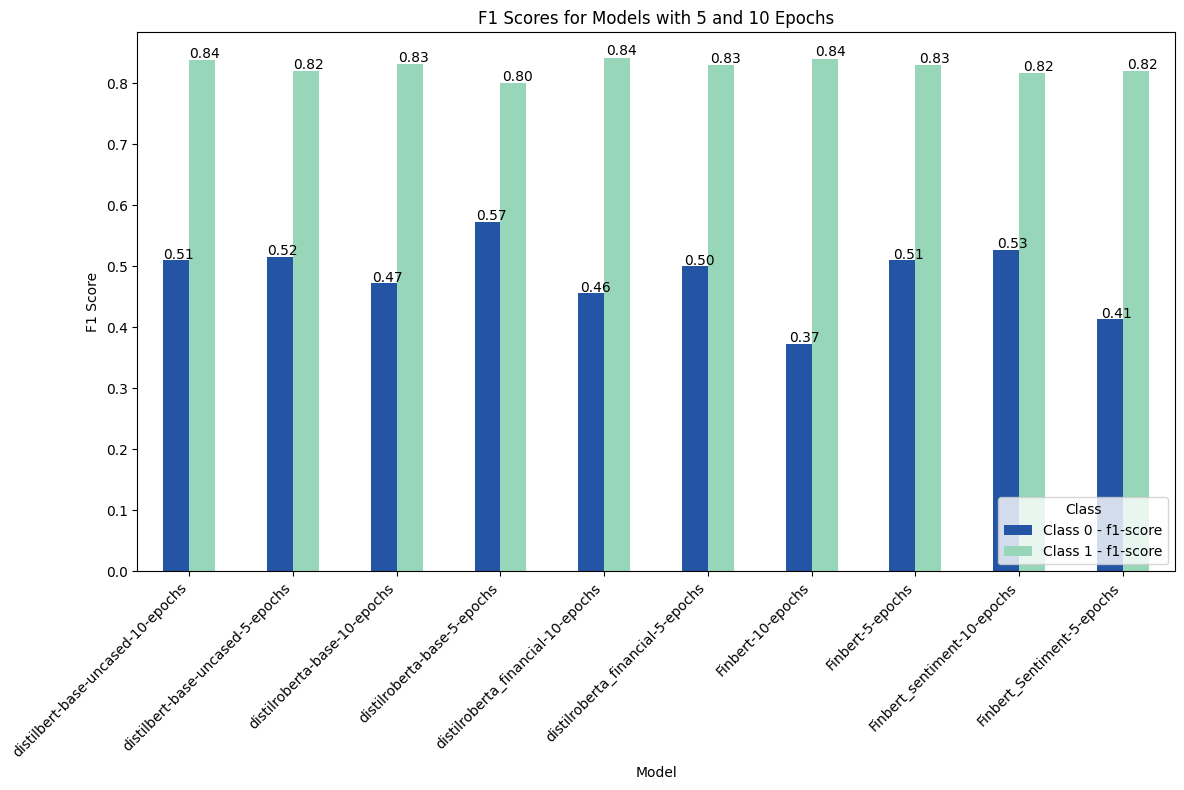

In [17]:
df_epochs = df[df['Model'].str.contains('5-epochs|10-epochs')]

# Set the model names as index
df_epochs.set_index('Model', inplace=True)

# Create a color map
color_map = cm.get_cmap('YlGnBu_r', len(df_epochs))

# Plot the F1 scores for Class 0 and Class 1
ax = df_epochs[['Class 0 - f1-score', 'Class 1 - f1-score']].plot(kind='bar', figsize=(12, 8), color=[color_map(0.2), color_map(0.6)])

# Add title and labels
plt.title('F1 Scores for Models with 5 and 10 Epochs')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Place the legend at the bottom right
plt.legend(title='Class', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

Looking at the complete graph of the individual models it can be seen that they all are very similar with slight deviations and exeptions in certain models with certain epochs. But it is possible to make out a model which outperformed the rest bei a slight margin. The distilroberta-base with 5 epochs had the best class 0 f1 score and is also one of the distilled models which means the computational effort is less compared to the other models which are not distilled. 

***Conclusion***


In conclusion, it can be said that the transformer models performed at an acceptable level, with the Class 1 prediction being relatively good but still facing challenges with the Class 0 prediction. Several factors contributed to this issue, such as the class imbalance in the dataset and the limited amount of data. Additionally, robustness appeared to be a factor influenced by these limitations. When training the same model with the same dataset, significantly different results were observed, indicating noticeable fluctuations in performance.

It should also be noted that the potential of transformer models is very high. However, due to technical and time limitations, the models were not optimized through methods such as hyperparameter tuning, yet they still achieved the best Class 0 scores compared to other approaches. This demonstrates that transformer models have potential to a certain degree, but there are limitations stemming from the quantity and quality of the available data. 